<a href="https://colab.research.google.com/github/siddharthgautam04/opencv-projecs/blob/main/mediapipe_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [1]:
!pip install mediapipe

     |████████████████████████████████| 32.3 MB 72 kB/s 


Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/tSePVHkxUCk


In [2]:
from google.colab import files

uploaded = files.upload()

Saving WIN_20210829_13_30_53_Pro.jpg to WIN_20210829_13_30_53_Pro.jpg
Saving WIN_20210829_13_30_54_Pro.jpg to WIN_20210829_13_30_54_Pro.jpg
Saving WIN_20210829_13_31_03_Pro.jpg to WIN_20210829_13_31_03_Pro.jpg
Saving WIN_20210829_13_31_04_Pro.jpg to WIN_20210829_13_31_04_Pro.jpg


WIN_20210829_13_30_53_Pro.jpg


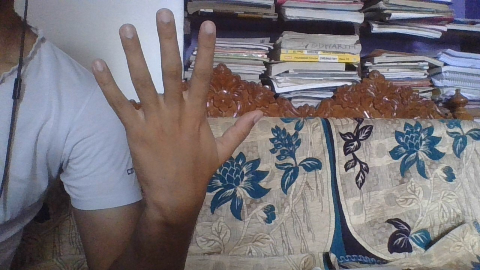

WIN_20210829_13_30_54_Pro.jpg


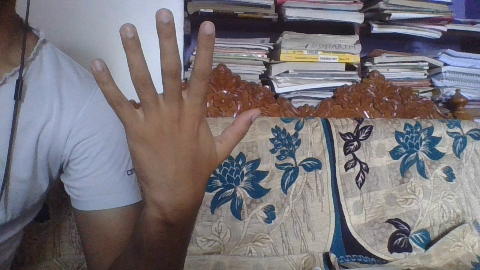

WIN_20210829_13_31_03_Pro.jpg


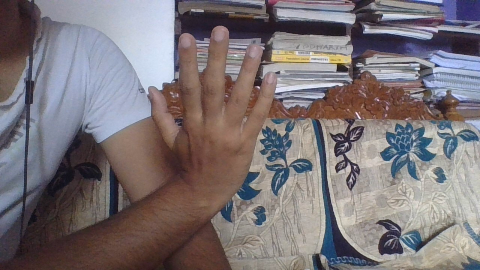

WIN_20210829_13_31_04_Pro.jpg


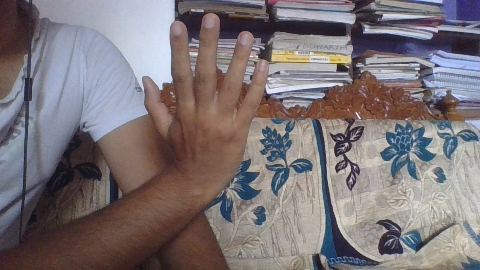

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [4]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Method

Handedness of WIN_20210829_13_30_53_Pro.jpg:
[classification {
  index: 0
  score: 0.9987751245498657
  label: "Left"
}
]
Hand landmarks of WIN_20210829_13_30_53_Pro.jpg:
Index finger tip coordinate: ( 717.9389953613281, 69.92973804473877)


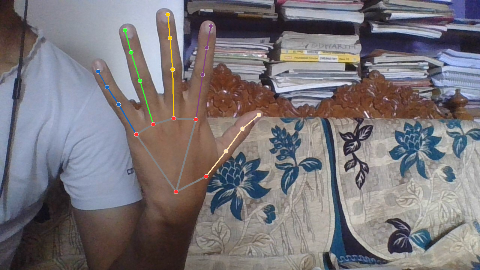

Handedness of WIN_20210829_13_30_54_Pro.jpg:
[classification {
  index: 0
  score: 0.9998006820678711
  label: "Left"
}
]
Hand landmarks of WIN_20210829_13_30_54_Pro.jpg:
Index finger tip coordinate: ( 720.9780120849609, 68.89157295227051)


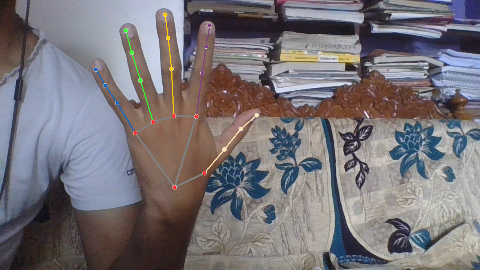

Handedness of WIN_20210829_13_31_03_Pro.jpg:
[classification {
  index: 0
  score: 0.9999999403953552
  label: "Left"
}
]
Hand landmarks of WIN_20210829_13_31_03_Pro.jpg:
Index finger tip coordinate: ( 619.5384216308594, 180.75893640518188)


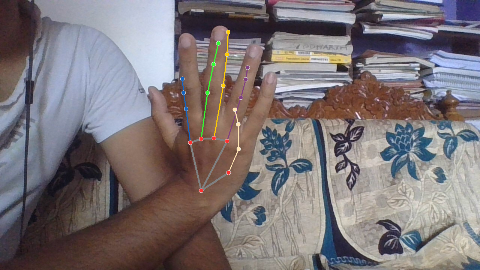

Handedness of WIN_20210829_13_31_04_Pro.jpg:
[classification {
  index: 0
  score: 0.9999998807907104
  label: "Left"
}
]
Hand landmarks of WIN_20210829_13_31_04_Pro.jpg:
Index finger tip coordinate: ( 599.32373046875, 125.46968221664429)


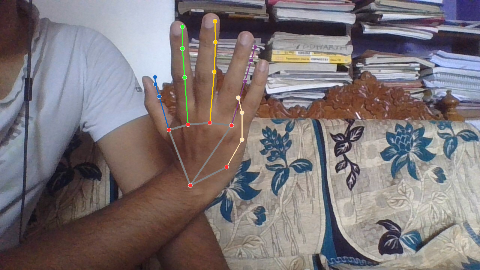

In [5]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))